# Problem Statement
## Implement a method to identify the language a document is written in. 

In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
#pip install nltk

In [11]:
import re
import nltk
from collections import defaultdict, Counter
from nltk.util import ngrams
from nltk.corpus import stopwords

In [12]:
# Download NLTK stopwords if needed
#nltk.download('stopwords')

In [13]:
class LanguageIdentifier:
    def __init__(self, n=3, top_k=300):
        self.n = n
        self.top_k = top_k
        self.language_profiles = {}

    def clean_text(self, text):
        text = text.lower()
        text = re.sub(r'[^a-zA-ZÀ-ÿ\s]', '', text)
        return text

    def create_profile(self, text):
        text = self.clean_text(text)
        ngram_freq = Counter()
        for word in text.split():
            ngrams_list = [''.join(ng) for ng in ngrams(f'_{word}_', self.n)]
            ngram_freq.update(ngrams_list)
        return [item[0] for item in ngram_freq.most_common(self.top_k)]

    def train(self, language_samples):
        for lang, text in language_samples.items():
            profile = self.create_profile(text)
            self.language_profiles[lang] = profile

    def distance(self, profile1, profile2):
        distance = 0
        for i, gram in enumerate(profile1):
            try:
                j = profile2.index(gram)
                distance += abs(i - j)
            except ValueError:
                distance += self.top_k  # If n-gram not found
        return distance

    def identify(self, text):
        input_profile = self.create_profile(text)
        distances = {}
        for lang, profile in self.language_profiles.items():
            distances[lang] = self.distance(input_profile, profile)
        return min(distances, key=distances.get)

In [14]:
# === Usage ===
if __name__ == "__main__":
    # Sample language training data
    samples = {
        'English': "This is a simple English text used for language detection.",
        'French': "Ceci est un texte français simple utilisé pour la détection de la langue.",
        'German': "Dies ist ein einfacher deutscher Text zur Spracherkennung.",
        'Spanish': "Este es un texto en español sencillo usado para la detección de idioma.",
        'Urdu': "یہ ایک انگریزی متن کا نمونہ ہے جو زبان کی کھوج کے لیے استعمال ہوتا ہے۔"
    }

In [15]:
identifier = LanguageIdentifier()
identifier.train(samples)

In [16]:
# Test with a new input

test_text = "Die Spracherkennung ist ein interessantes Problem. Implementieren Sie eine Methode zur Identifizierung der Sprache, in der ein Dokument verfasst ist."
predicted_lang = identifier.identify(test_text)
print(f"Predicted language: {predicted_lang}")

Predicted language: German


📝 Notes
</p>
This is a reimplementation of the Cavnar-Trenkle n-gram approach.
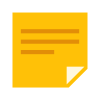